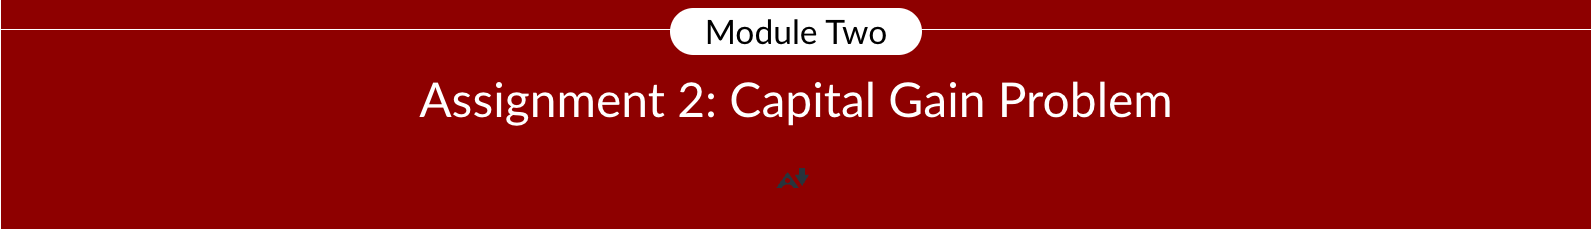

Objective:
The goal of this assignment is to ensure your understanding and application of the Stack and Queue data structures. You'll solve a problem scenario requiring the use of either Stack, Queue, or both. By the end of this assignment, you should be familiar with these abstract data types, their usage, and implementation. You might be surprised to learn how frequently these data structures are used in computer systems!

Problem Scenario:
Consider a scenario where shares of a company's common stock are bought and sold. The capital gain (or sometimes loss) is the difference between the selling price and the original purchase price. This is straightforward for a single share, but if multiple shares are sold, which were bought over a period of time, identifying the shares sold becomes challenging.

A common accounting principle for this situation is the FIFO (First In, First Out) protocol, meaning the shares sold are those held for the longest time. For example, if 100 shares are bought at \\$20 each on day 1, 20 shares at \\$24 on day 2, 200 shares at \\$36 on day 3, and 150 shares are sold on day 4 at \\$30 each, the FIFO protocol implies that out of the 150 shares sold, 100 were bought on day 1, 20 on day 2, and 30 on day 3. The capital gain would therefore be 100 * 10 + 20 * 6 + 30 * (-6), or $940.     

Tasks:
Your task is to write a Python program that takes a sequence of transactions as input. Each transaction will be in the form of "buy x share(s) at y each" or "sell x share(s) at y each," with the assumption that the transactions occur on consecutive days and the values x and y are integers. The output should be the total capital gain (or loss) for the entire sequence, using the FIFO protocol to identify shares.

## Sample runs:

Input:   
buy 100 shares at 20 each   
buy 20 shares at 24 each   
buy 200 shares at 36 each   
sell 150 shares at 30 each   


Output:   
The total capital gain is $940   

-------------------------------     
Input:   
buy 50 shares at 10 each    
buy 30 shares at 15 each    
buy 100 shares at 20 each   
sell 70 shares at 18 each    


Output:    
The total capital gain is $460  

-------------------------------
Input:   
buy 60 shares at 10 each    
buy 55 shares at 25 each    
buy 78 shares at 19 each   
sell 130 shares at 22 each    


Output:    
The total capital gain is $600

In [3]:
from collections import deque

def process_transactions(transactions):
    # Initialize a queue to keep track of the buy transactions
    queue = deque()
    total_gain = 0  # Initialize total gain/loss

    # Iterate over each transaction in the list
    for transaction in transactions:
        # Split the transaction string into its components
        words = transaction.split()
        action, quantity, _, price = words[0], int(words[1]), words[2], int(words[-2])

        # If it's a buy transaction, add it to the queue
        if action == "buy":
            queue.append((price, quantity))
        # If it's a sell transaction, process it
        elif action == "sell":
            remaining = quantity  # The number of shares to sell
            # Continue selling until all shares are sold
            while remaining > 0:
                buy_price, buy_quantity = queue.popleft()  # Get the oldest buy transaction
                sell_quantity = min(buy_quantity, remaining)  # Determine how many shares to sell
                total_gain += sell_quantity * (price - buy_price)  # Calculate gain/loss for these shares
                remaining -= sell_quantity  # Reduce the remaining shares to sell

                # If there are unsold shares from the oldest buy, put them back in the queue
                if buy_quantity > sell_quantity:
                    queue.appendleft((buy_price, buy_quantity - sell_quantity))

    return total_gain  # Return the total gain/loss

def main():
    transactions = []  # List to store all transactions
    print("Initial transaction:")

    # Get initial buy transaction from the user
    shares = input("Enter the number of shares you are buying: ")
    price = input("Enter the price for each share: ")
    transactions.append(f"buy {shares} shares at {price} each")

    # Loop to get additional transactions
    while True:
        action = input("Do you want to 'buy' or 'sell' shares? (type 'done' to finish): ").lower()
        if action == 'done':
            break  # Exit the loop if user is done
        elif action in ['buy', 'sell']:
            # Get transaction details from the user
            shares = input(f"Enter the number of shares you want to {action}: ")
            price = input(f"Enter the price for each share: ")
            transactions.append(f"{action} {shares} shares at {price} each")
        else:
            print("Invalid input. Please type 'buy', 'sell', or 'done'.")

    # Process the transactions if there are any
    if transactions:
        gain = process_transactions(transactions)
        print('\nInput:')
        for t in transactions:
            print(t)
        print('\nOutput:')
        print(f"The total capital gain is ${gain}")
    else:
        print("No transactions entered.")

if __name__ == '__main__':
    main()  # Execute the main function


Initial transaction:


Enter the number of shares you are buying:  60
Enter the price for each share:  10
Do you want to 'buy' or 'sell' shares? (type 'done' to finish):  buy
Enter the number of shares you want to buy:  55
Enter the price for each share:  25
Do you want to 'buy' or 'sell' shares? (type 'done' to finish):  buy
Enter the number of shares you want to buy:  78
Enter the price for each share:  19
Do you want to 'buy' or 'sell' shares? (type 'done' to finish):  sell
Enter the number of shares you want to sell:  130
Enter the price for each share:  22
Do you want to 'buy' or 'sell' shares? (type 'done' to finish):  done



Input:
buy 60 shares at 10 each
buy 55 shares at 25 each
buy 78 shares at 19 each
sell 130 shares at 22 each

Output:
The total capital gain is $600
